In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, OneHotEncoder, TargetEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.preprocessing import PolynomialFeatures, QuantileTransformer, PowerTransformer
from sklearn.model_selection import train_test_split 

from sklearn.preprocessing import PolynomialFeatures

from sklearn.compose import ColumnTransformer, make_column_transformer, TransformedTargetRegressor\

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Ridge, Lasso, ElasticNet, BayesianRidge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor

import category_encoders as ce

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold, KFold

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


from sklearn.manifold import TSNE
from sklearn.decomposition import PCA


from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection  import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFpr
from sklearn.feature_selection import SelectFdr
from sklearn.feature_selection import SelectFwe
from sklearn.feature_selection import f_regression

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.api import abline_plot
from sklearn.feature_selection import SelectPercentile
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

### Обучение и выполнение лучшей модели

In [2]:
# Путь к тренировочному набору
path_train = 'train_house_B.csv' # содержит только имя файла, без имен папок
# Путь к тестовому набору
path_test = 'test_house_B.csv'# содержит только имя файла, без имен папок

In [3]:
df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)

In [4]:
X = df_train.drop(columns = ['price'])
y = df_train['price']

##  признаки

In [5]:
columns = ['0', '2', '4', '12', '17', '18', '19', '20', '21', '22', '24', '25', '27']

In [6]:
X = X.loc[:, columns]

In [7]:
model_f = Pipeline([
                ('model', TransformedTargetRegressor(
                        regressor = Pipeline(steps=[
                                ('estimator', RandomForestRegressor(criterion='absolute_error', max_depth=None, min_samples_leaf=6, min_samples_split=3, n_estimators=20))
                            ]),
                        transformer=PowerTransformer(),
                        check_inverse = False)
                )])

In [8]:
linear_model = Pipeline([
    ('model', TransformedTargetRegressor(
        regressor=Pipeline(steps=[
            ('estimator', LinearRegression(fit_intercept=False))
        ]),
        transformer=PowerTransformer(),
        check_inverse=False)
    )
])

In [9]:
model_r = Pipeline([
                ('model', TransformedTargetRegressor(
                        regressor = Pipeline(steps=[
                                ('estimator', Ridge(alpha=2.2, solver='saga'))
                            ]),
                        transformer=PowerTransformer(),
                        check_inverse = False)
                )])

In [10]:
eclf = VotingRegressor(
estimators=[('ridge', model_r), ('for', model_f), ('lin', linear_model)])

In [11]:
eclf.fit(X,y)

VotingRegressor(estimators=[('ridge',
                             Pipeline(steps=[('model',
                                              TransformedTargetRegressor(check_inverse=False,
                                                                         regressor=Pipeline(steps=[('estimator',
                                                                                                    Ridge(alpha=2.2,
                                                                                                          solver='saga'))]),
                                                                         transformer=PowerTransformer()))])),
                            ('for',
                             Pipeline(steps=[('model',
                                              TransformedTargetRegressor(check_inverse=False,
                                                                         regressor=Pipeline(steps=[('estimator',
                                                                                                    RandomForestRegressor(criterion='absolute_error',
                                                                                                                          min_samples_leaf=6,
                                                                                                                          min_samples_split=3,
                                                                                                                          n_estimators=20))]),
                                                                         transformer=PowerTransformer()))])),
                            ('lin',
                             Pipeline(steps=[('model',
                                              TransformedTargetRegressor(check_inverse=False,
                                                                         regressor=Pipeline(steps=[('estimator',
                                                                                                    LinearRegression(fit_intercept=False))]),
                                                                         transformer=PowerTransformer()))]))])

In [12]:
# Блок предсказания с использованием тестового набора

In [13]:
mask = columns
X_test = pd.read_csv(path_test)[mask]

y_pred = eclf.predict(X_test)
print(y_pred)

[5061508.33028583 3779511.26425567 7895865.34508888 6880001.20114162
 6753352.97342243 3461362.37370436 3899774.06157967 3747683.47314445
 3617401.72270083 4512908.6043689  4686954.79060873 3864515.43612446
 3486808.12274938 4813407.77120392 6461319.56821722 5477381.26178906
 3305377.885114   3240725.82552879 6667077.88440283 3403372.93118598
 3861762.29265457 4423740.59948124 3873565.35900235 2718872.97121078
 3362304.43452906 3468996.62510719 6386353.32208719 3113902.57527762
 6122642.35764771 4758923.45164906 3955883.21260924 4124207.06298169
 5662056.12223102 3034407.9989389  3437124.17126309 5111688.23125651
 3036449.68966628 4141326.40837897 3688328.26147784 6148138.4042595
 5752799.06894264 9644586.90883348 3555660.91478377 4635345.80745813
 3460678.97725902 5737645.00859988 8760952.23885181 3691500.58637877
 5608908.43446486 3873565.35900235 4468373.9017481  5301067.42866339
 3530791.93158462 6430170.77004579 4257175.01264361 5098860.81249961
 3374503.16930411 3437043.72349043 

In [14]:
# Название вектора предсказанных значений  y_predict полученого на основании тестового набора

In [15]:
y_predict = y_pred

In [16]:
y_predict

array([5061508.33028583, 3779511.26425567, 7895865.34508888,
       6880001.20114162, 6753352.97342243, 3461362.37370436,
       3899774.06157967, 3747683.47314445, 3617401.72270083,
       4512908.6043689 , 4686954.79060873, 3864515.43612446,
       3486808.12274938, 4813407.77120392, 6461319.56821722,
       5477381.26178906, 3305377.885114  , 3240725.82552879,
       6667077.88440283, 3403372.93118598, 3861762.29265457,
       4423740.59948124, 3873565.35900235, 2718872.97121078,
       3362304.43452906, 3468996.62510719, 6386353.32208719,
       3113902.57527762, 6122642.35764771, 4758923.45164906,
       3955883.21260924, 4124207.06298169, 5662056.12223102,
       3034407.9989389 , 3437124.17126309, 5111688.23125651,
       3036449.68966628, 4141326.40837897, 3688328.26147784,
       6148138.4042595 , 5752799.06894264, 9644586.90883348,
       3555660.91478377, 4635345.80745813, 3460678.97725902,
       5737645.00859988, 8760952.23885181, 3691500.58637877,
       5608908.43446486,

## Использованные признаки (распечатал)

In [17]:
print(columns)

['0', '2', '4', '12', '17', '18', '19', '20', '21', '22', '24', '25', '27']


(137,) (137,)
Отрицательные цены -  0
Max Error: 5,845,667
 
----------------------
   MAPE Error: 16.09
----------------------


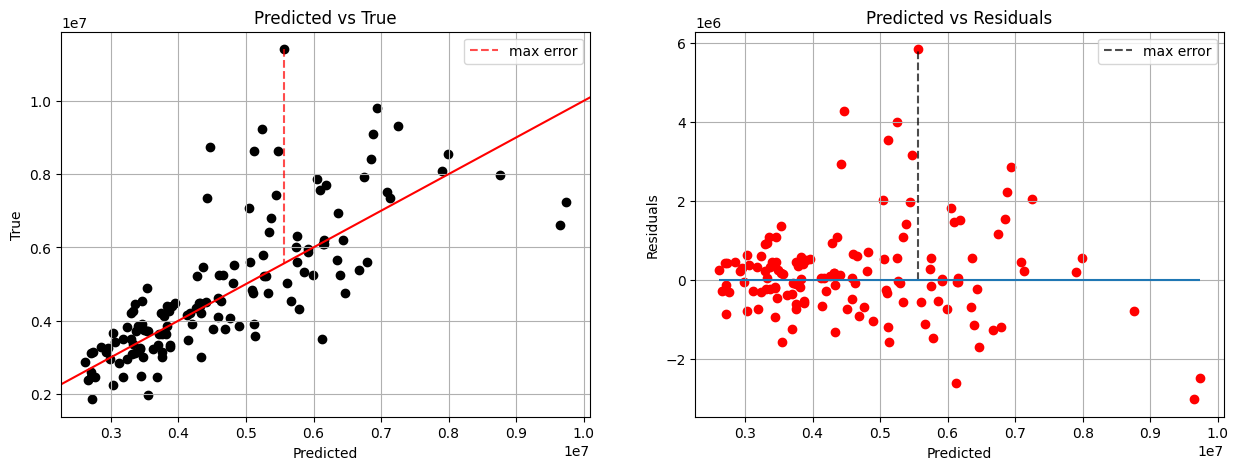

In [18]:
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

y_true = pd.read_csv("test_Y_true_house_B.csv").values.reshape(-1)
print(y_predict.shape, y_true.shape)
print('Отрицательные цены - ', sum(y_predict<0))

def plot_2_error(y_true, y_predicted):
    residuals = y_true - y_predicted
    max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
    max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
    max_true, max_pred = y_true[max_idx], y_predicted[max_idx]
    mape = mean_absolute_percentage_error(y_true, y_predict)
    print("Max Error:", "{:,.0f}".format(max_error))
    print(' ')
    print('----------------------')
    print("   MAPE Error:", "{:,.2f}".format(mape*100))
    print('----------------------')

    ## Plot predicted vs true
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    from statsmodels.graphics.api import abline_plot
    ax[0].scatter(y_predicted, y_true, color="black")
    abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
    ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
    ax[0].grid(True)
    ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
    ax[0].legend()

    ## Plot predicted vs residuals
    ax[1].scatter(y_predicted, residuals, color="red")
    ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
    ax[1].grid(True)
    ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
    ax[1].hlines(y=0, xmin=np.min(y_predicted), xmax=np.max(y_predicted))
    ax[1].legend()
    plt.show()

plot_2_error(y_true, y_predict)

In [20]:
mask = columns

import pickle
with open('saved_dictionary_b.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

color_dict = pd.Series(loaded_dict).to_frame().reset_index().sort_values(by=0).reset_index(drop=True)
color = (color_dict['index'].isin(mask)).map({True: 'background-color: yellow', False: ''})
color_dict.style.apply(lambda s: color)

,index,0
0,10,1
1,27,airconditioning
2,2,area
3,12,area bathrooms
4,4,area bedrooms
5,5,area stories
6,15,basement
7,22,bathrooms
8,19,bathrooms stories
9,21,bedrooms
